# Exploratory Data Analysis

Attribute Information:

* InvoiceNo: id транзакции. Если id начинается с буквы "c" - заказ был отменен
* StockCode: код товара
* Description: название товара
* Quantity: количество товара за транзакцию
* InvoiceDate: дата и время выставления счета. День и время, когда была сгенерирована транзакция
* UnitPrice: цена за единицу товара в фунтах стерлингов (£)
* CustomerID: id клиента
* Country: название страны, в которой проживает клиент

# Exploratory Data Analysis summary

Краткие выводы по анализу:
1. Больше всего заказов - из UK и ближайших стран
2. Клиенты потратившие больше всего денег - из UK и Нидерландов
3. Компания получает наибольшее количество заказов от клиентов в Великобритании (поскольку это британская компания).
top-5 стран (включая Великобританию), которые размещают наибольшее количество заказов:
    - Великобритания
	- Германия 
	- Франция
	- Ирландия (EIRE)
	- Испания
4. Поскольку компания получает наибольшее количество заказов от клиентов из Великобритании, английские клиенты тратят больше всего на свои покупки.
top-5 стран (включая Великобританию), которые тратят больше всего денег на покупки:
    - Великобритания
	- Нидерланды
	- Ирландия (EIRE)
	- Германия
	- Франция
5. Самые высокие продажи зафиксированы в ноябре 2011 года
6. За весь исследуемый период транзакций в субботу не проводилось. Возможно, это связано с тем, что в субботу компания не работала (что, вообще говоря, странно)
7. Количество заказов, полученных компанией, как правило, увеличивается с понедельника по четверг и уменьшается после этого
8. Компания получает наибольшее количество заказов в 12:00 
	- Возможно, большинство клиентов совершали покупки во время обеденного перерыва с 12:00 до 14:00
9. Компания, как правило, раздает подарки время от времени каждый месяц (кроме июня 2011 года)
	- Из текущего датасета не понятно какие факторы способствуют раздаче подарков конкретным покупателям

In [1]:
import datetime
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в retina выглядят более четкими
%config InlineBackend.figure_format = 'retina' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
color = sns.color_palette()

In [2]:
df = pd.read_csv('data/online_retail_processed.csv', sep='\t')
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,week,day,weekday,hour,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850,United Kingdom,2010-12,48,1,Wednesday,8,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850,United Kingdom,2010-12,48,1,Wednesday,8,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850,United Kingdom,2010-12,48,1,Wednesday,8,20.340


In [3]:
df.shape

(406829, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
 8   year_month   406829 non-null  object        
 9   week         406829 non-null  int64         
 10  day          406829 non-null  int64         
 11  weekday      406829 non-null  object        
 12  hour         406829 non-null  int64         
 13  total_price  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 43.5+ MB


## How many orders made by the customers?

In [5]:
# top-5 по количеству заказов
orders = df.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4050,17841,United Kingdom,7983
1903,14911,EIRE,5903
1308,14096,United Kingdom,5128
338,12748,United Kingdom,4642
1682,14606,United Kingdom,2782


In [6]:
# top-5 по сумме всех заказов
orders = df.groupby(by=['CustomerID', 'Country'], as_index=False)['total_price'].sum()
orders.sort_values(by='total_price', ascending=False).head()

,CustomerID,Country,total_price
3041,16446,United Kingdom,336942.100
1711,14646,Netherlands,280923.020
4241,18102,United Kingdom,262876.110
3766,17450,United Kingdom,201619.410
1903,14911,EIRE,155077.500


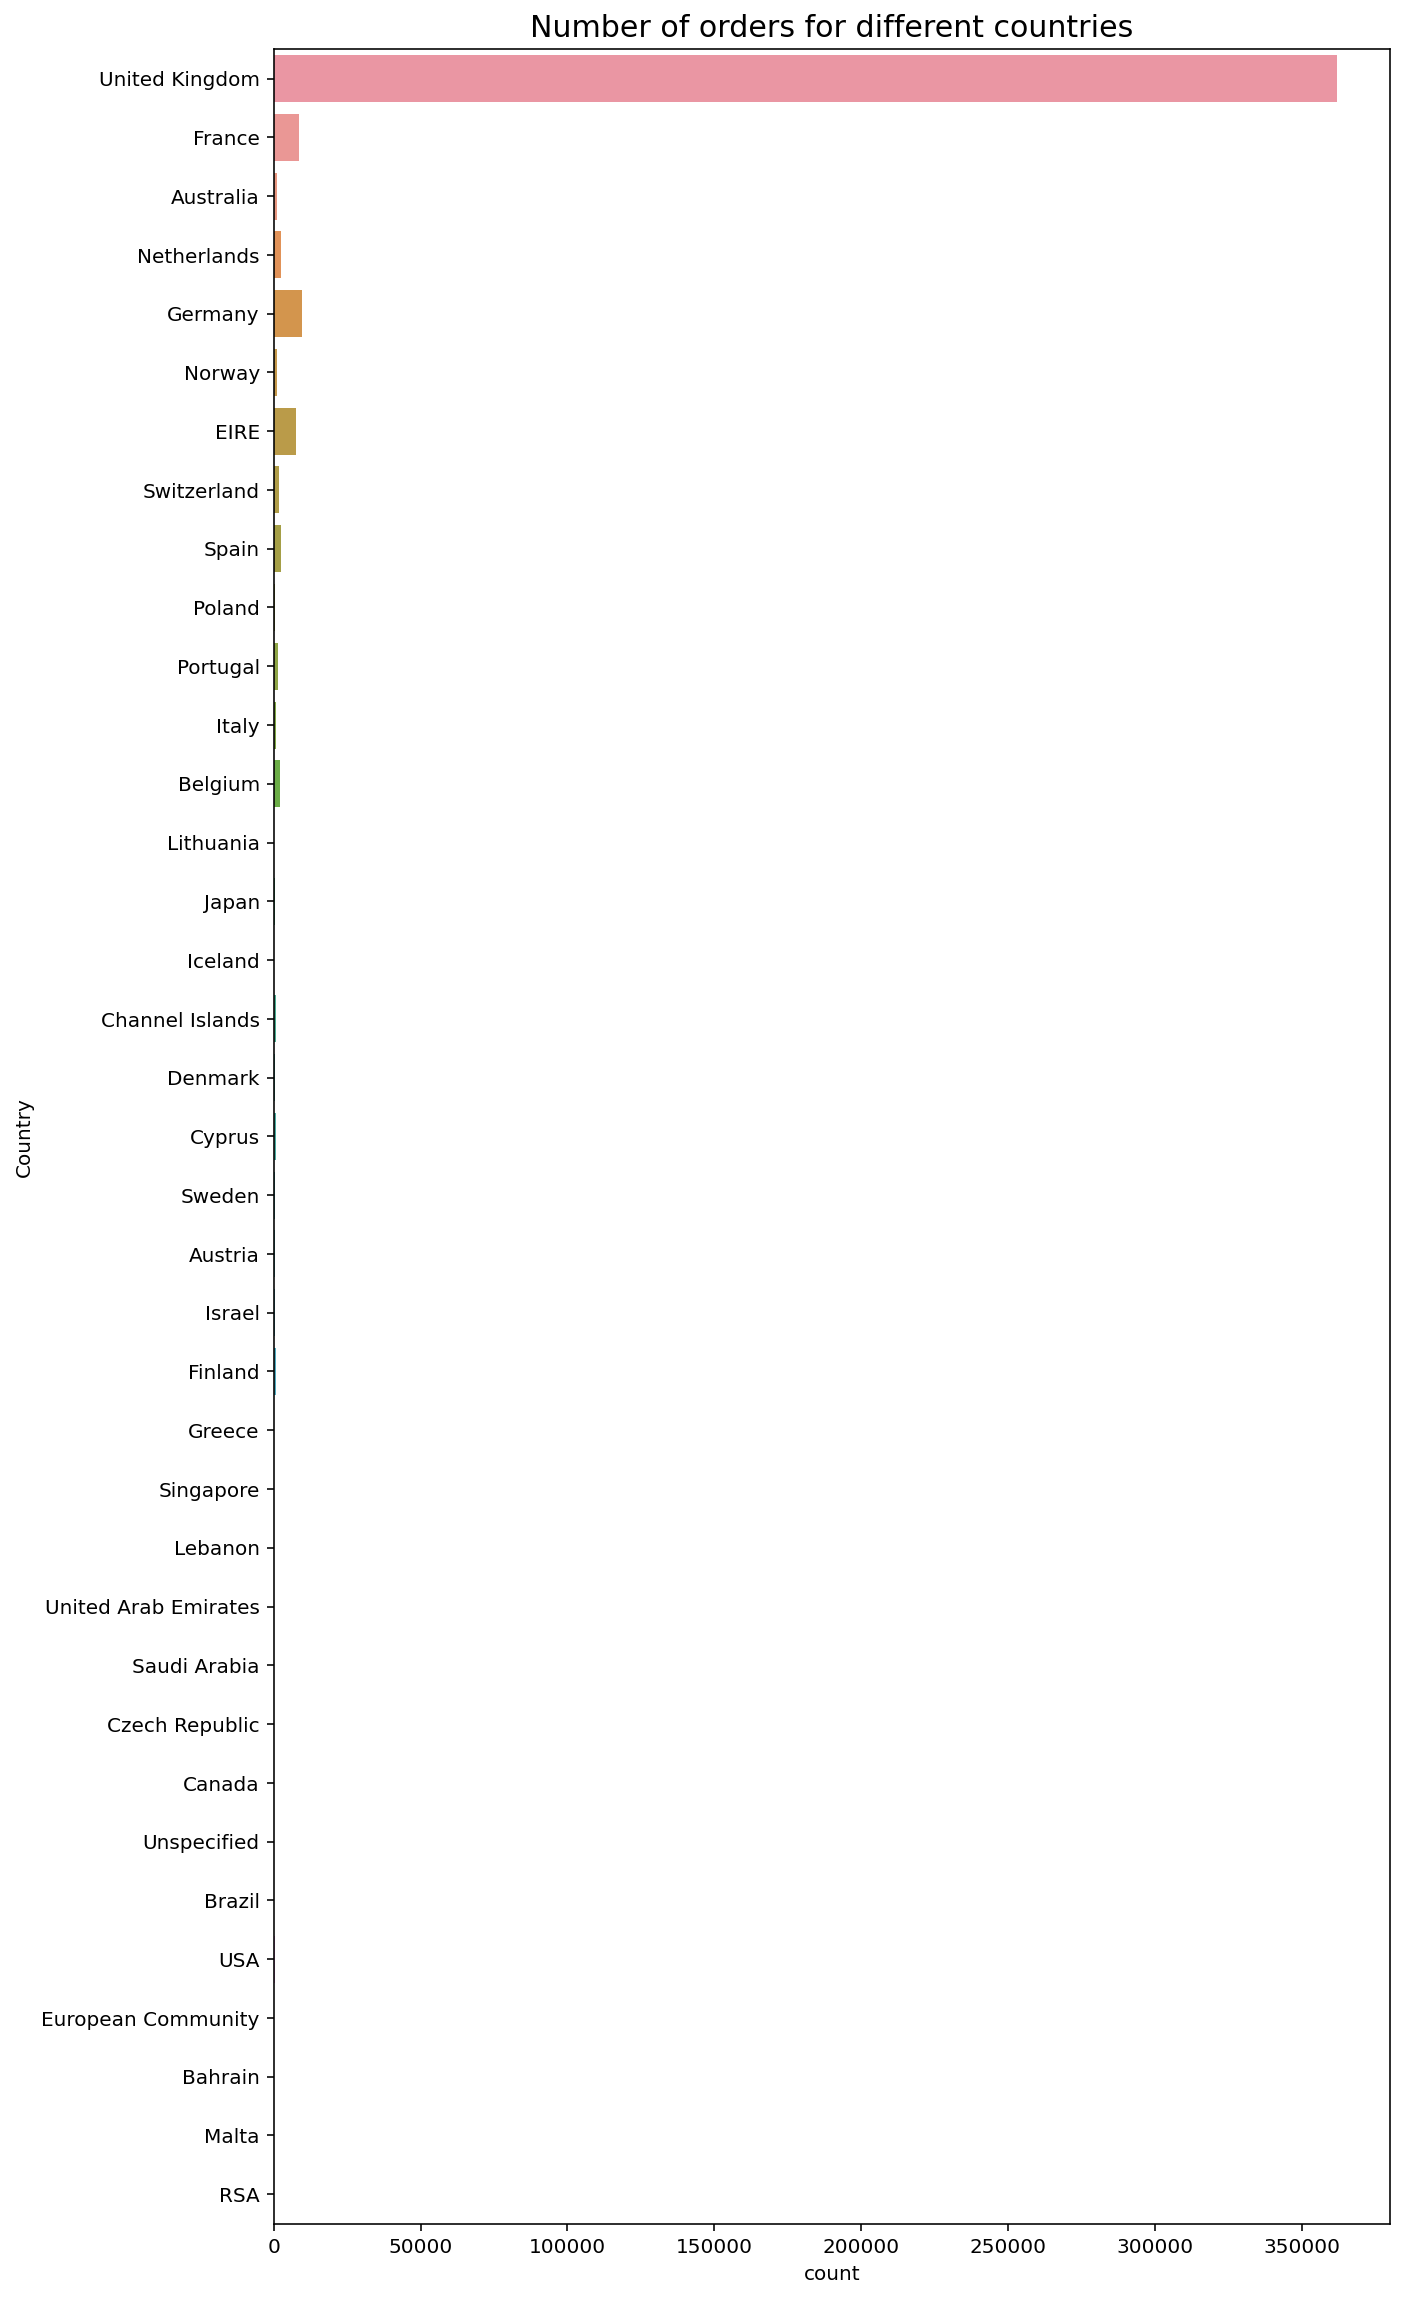

In [7]:
# кол-во заказов из UK во много раз больше, чем из остальных стран
plt.figure(figsize=(10,20))
plt.title('Number of orders for different countries', fontsize=15)
sns.countplot(y='Country', data=df);

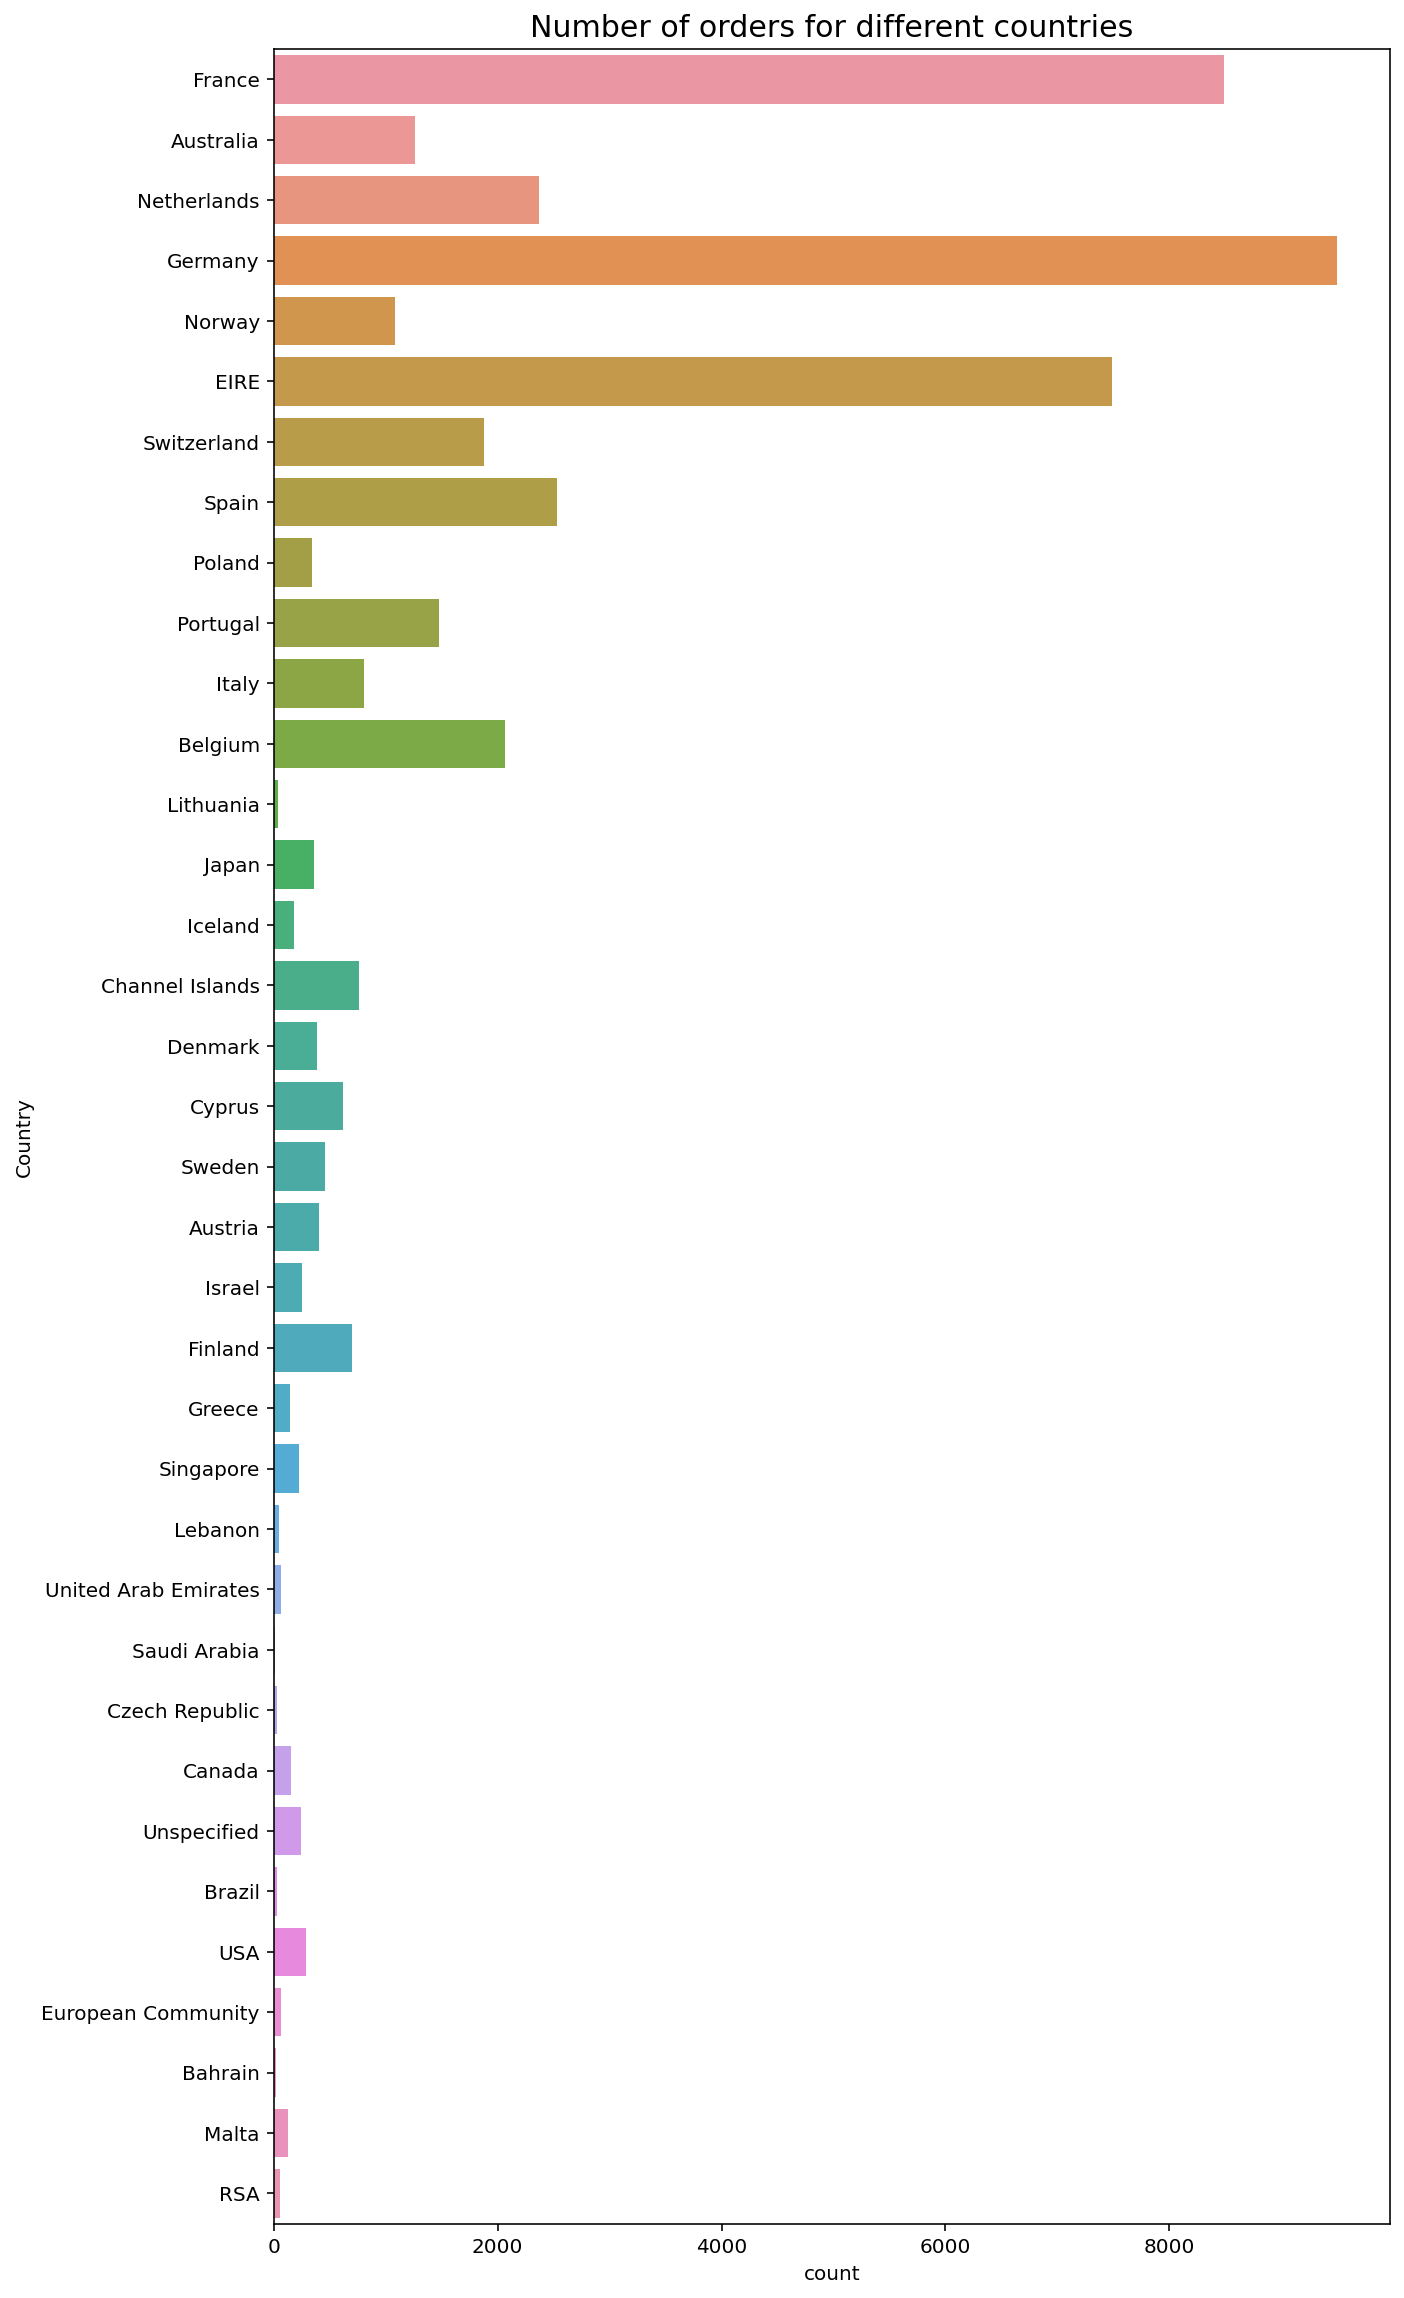

In [8]:
# тоже самое без UK
plt.figure(figsize=(10,20))
plt.title('Number of orders for different countries', fontsize=15)
sns.countplot(y='Country', data=df[df['Country']!='United Kingdom']);

Большинство заказов приходят из UK и Ирландии (магазин зарегистрирован в UK).
Покупатель с самым большим кол-ом заказов (CustomerID=17841) так же из UK.
Скорее всего, это какой-то другой оптовый ритейлер (7983 заказов в год).

После UK по объему заказов идут ближайшие к UK страны ЕС: Франция, Австрия, Голландия, Германия и др

## How much money spent by the countries?

In [9]:
# top-5
money_spent = df.groupby(by=['Country'], as_index=False)['total_price'].sum().sort_values('total_price', ascending=False)
money_spent.head()

,Country,total_price
35,United Kingdom,7848909.714
23,Netherlands,286231.140
10,EIRE,280806.580
14,Germany,236036.070
13,France,221335.260


In [10]:
# bottom-5
money_spent.tail()


,Country,total_price
4,Brazil,1143.600
27,RSA,1002.310
8,Czech Republic,945.760
2,Bahrain,548.400
28,Saudi Arabia,160.670


### How many orders?

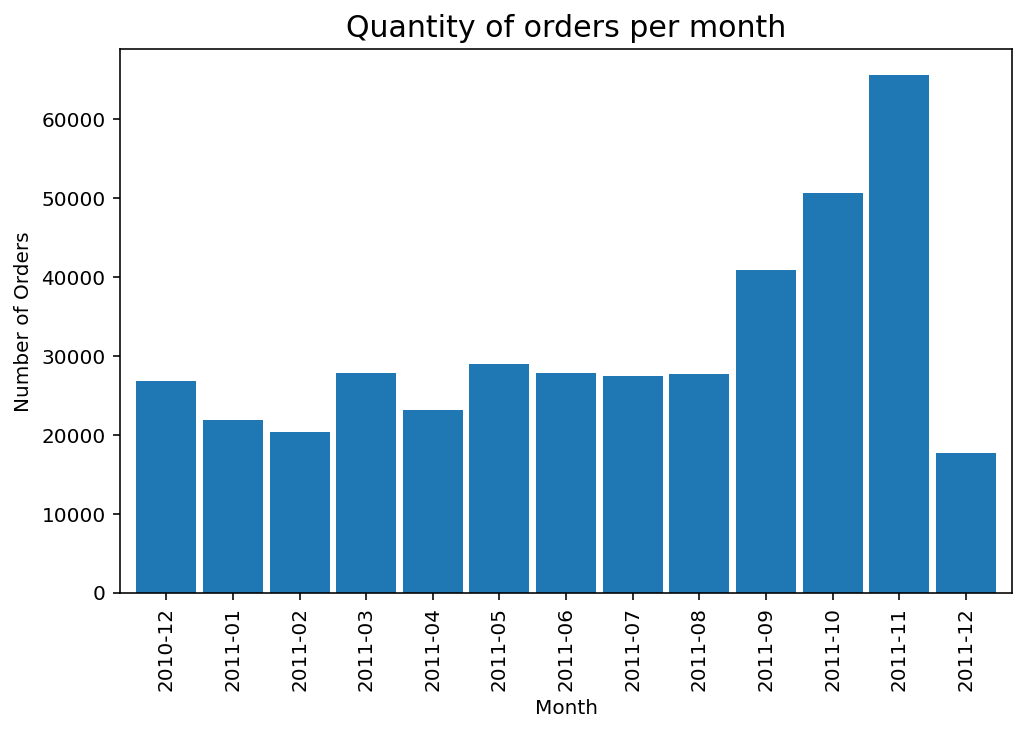

In [28]:
df.groupby('year_month')['InvoiceNo'].count().plot(kind='bar', width=0.9)
plt.title('Quantity of orders per month', fontsize=15)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Number of Orders',fontsize=10);

Больше всего заказов - под конец года, что логично. По описанию, магазин торгует различными подарками.

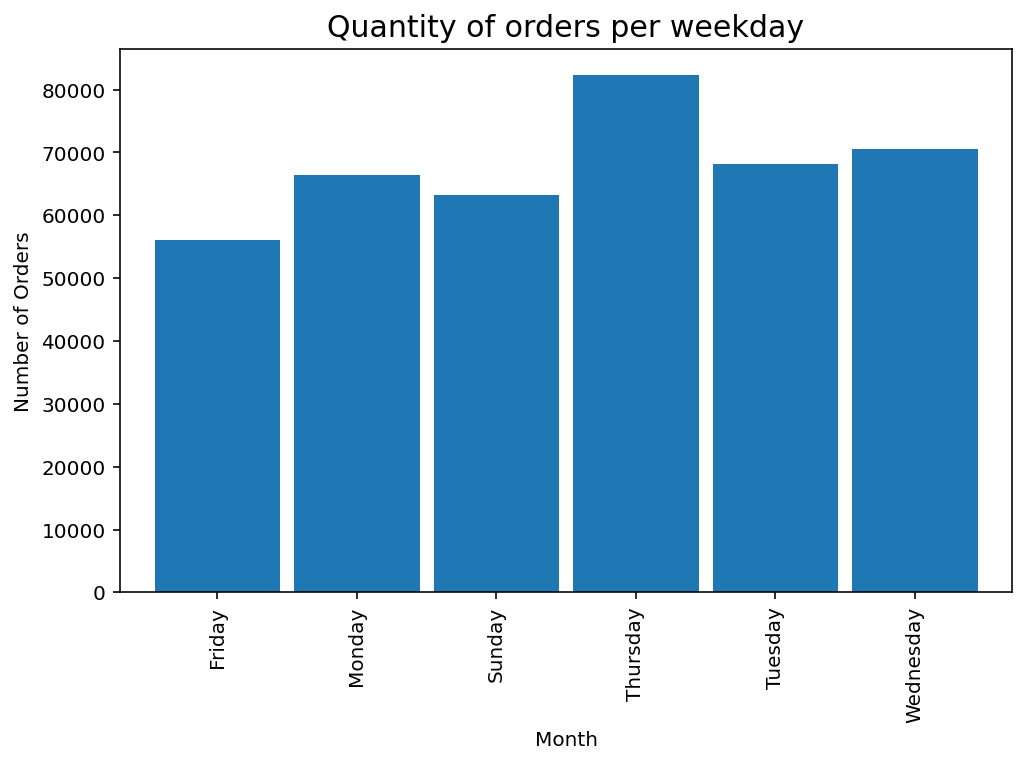

In [29]:
df.groupby('weekday')['InvoiceNo'].count().plot(kind='bar', width=0.9)
plt.title('Quantity of orders per weekday', fontsize=15)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Number of Orders',fontsize=10);

Люди чаще делали заказы по четвергам. А по субботам магазин, судя по всему, не работал (интересно, почему).

## Frequency of Day of week Vs Hour of day

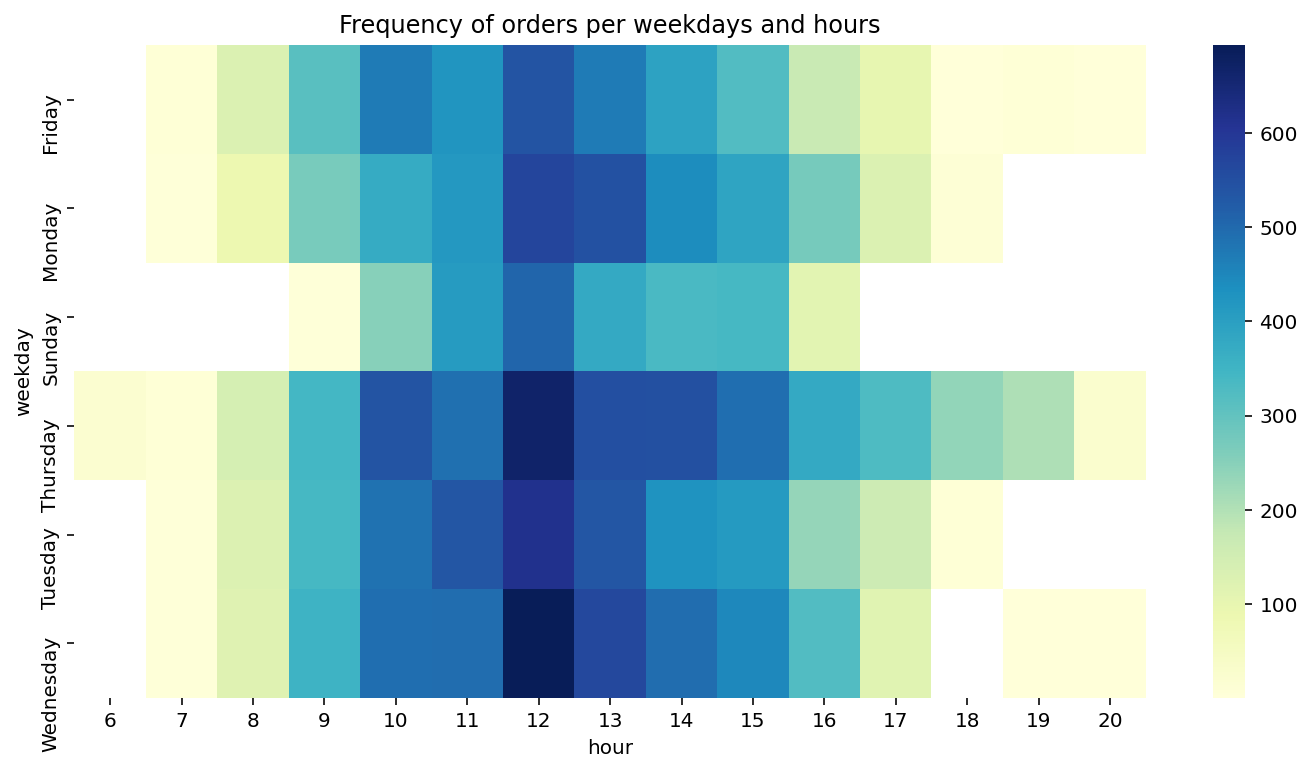

In [13]:
# частота заказов по дням недели и часам
grouped_df  = df.groupby(["weekday", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

grouped_df = grouped_df.pivot('weekday', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="YlGnBu")
plt.title("Frequency of orders per weekdays and hours")
plt.show()

Пик продаж приходится на 12 дня, в основном в будние дни. В воскресенье активность покупателей не очень высокая.
Возможно, большинство людей делают заказы  на работе в обеденный перерыв.

# Discover patterns for Unit Price

In [14]:
df['UnitPrice'].describe()

count   406829.000
mean         3.460
std         69.315
min          0.000
25%          1.250
50%          1.950
75%          3.750
max      38970.000
Name: UnitPrice, dtype: float64

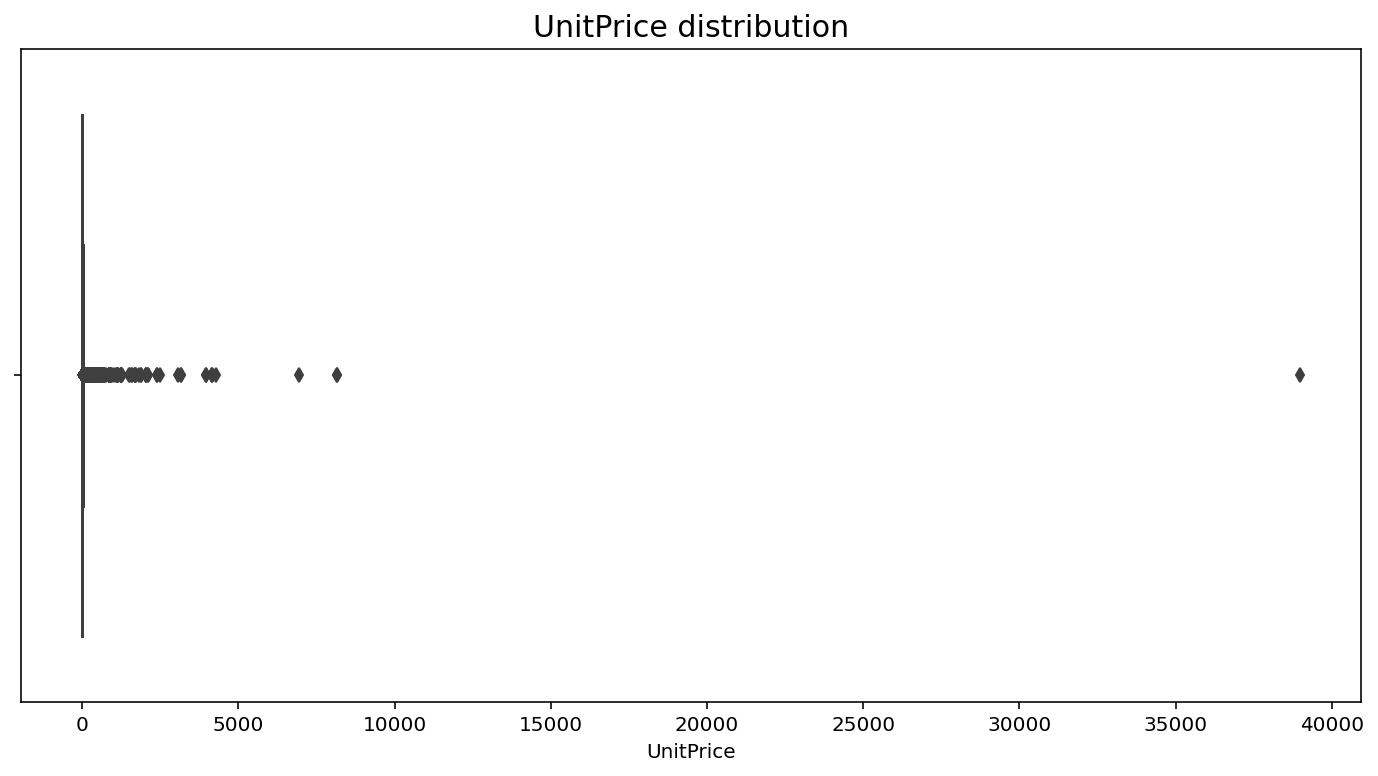

In [15]:
# посмотрим на распределение цен
plt.figure(figsize=(12,6))
sns.boxplot(df['UnitPrice'])
plt.title('UnitPrice distribution', fontsize=15);

Видно, что есть некоторое кол-во очень дорогих товаров. Попробуем отсечь их по 99 перцентилю и посмотреть на распределение оставшихся.

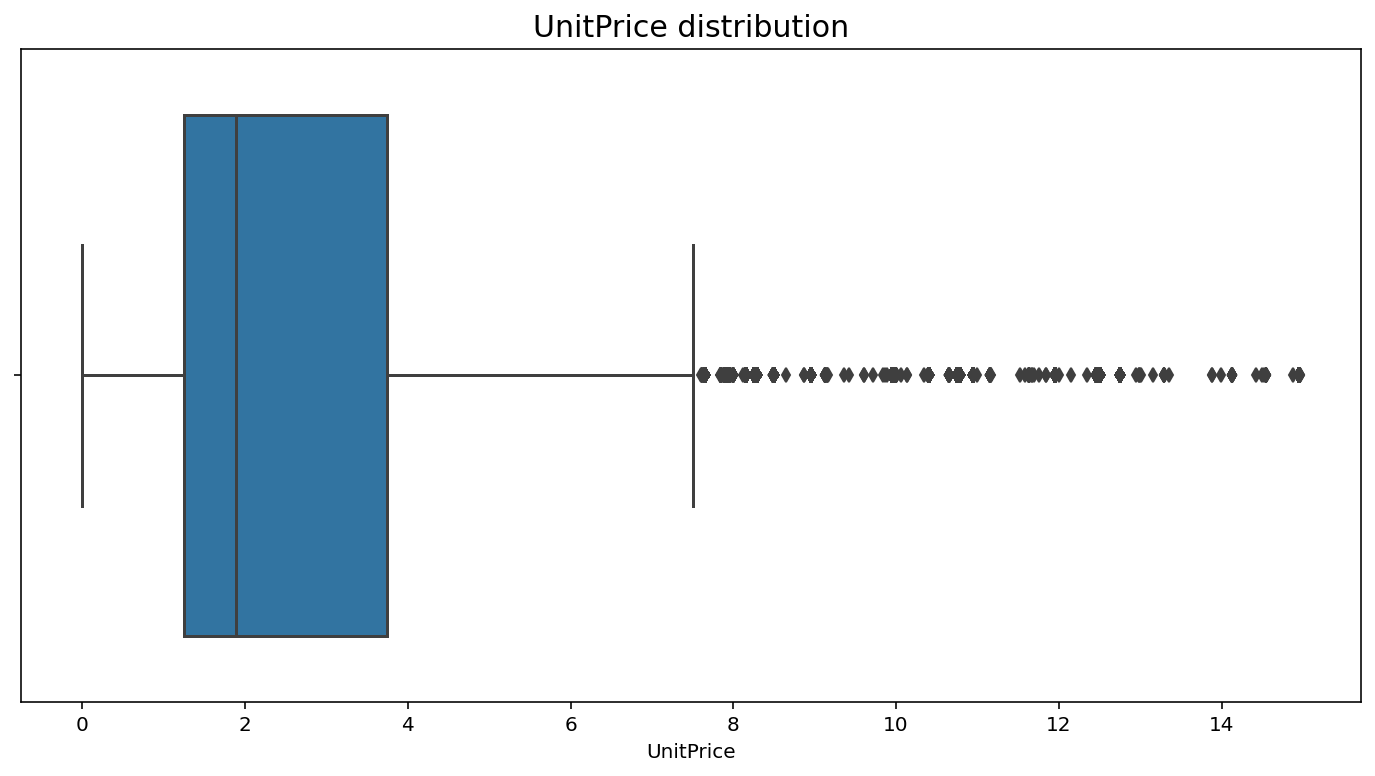

In [16]:
# считаем верхнюю границу цен
upper_bound = np.percentile(df['UnitPrice'], 99)

plt.figure(figsize=(12,6))
sns.boxplot(df[df['UnitPrice'] < upper_bound]['UnitPrice'])
plt.title('UnitPrice distribution', fontsize=15);

Медиана цен - около 2 фунтов за шутку. Интересно, что в датасете присутствуют товары, проданные бесплатно.

In [17]:
# бесплатные подарки
free_goods = df[df['UnitPrice'] == 0]
free_goods.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,week,day,weekday,hour,total_price
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.000,12647,Germany,2010-12,48,5,Sunday,14,0.000
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.000,16560,United Kingdom,2010-12,50,16,Thursday,14,0.000
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.000,14911,EIRE,2010-12,51,21,Tuesday,13,0.000
29881,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.000,13081,United Kingdom,2011-01,1,6,Thursday,16,0.000
29883,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.000,13081,United Kingdom,2011-01,1,6,Thursday,16,0.000


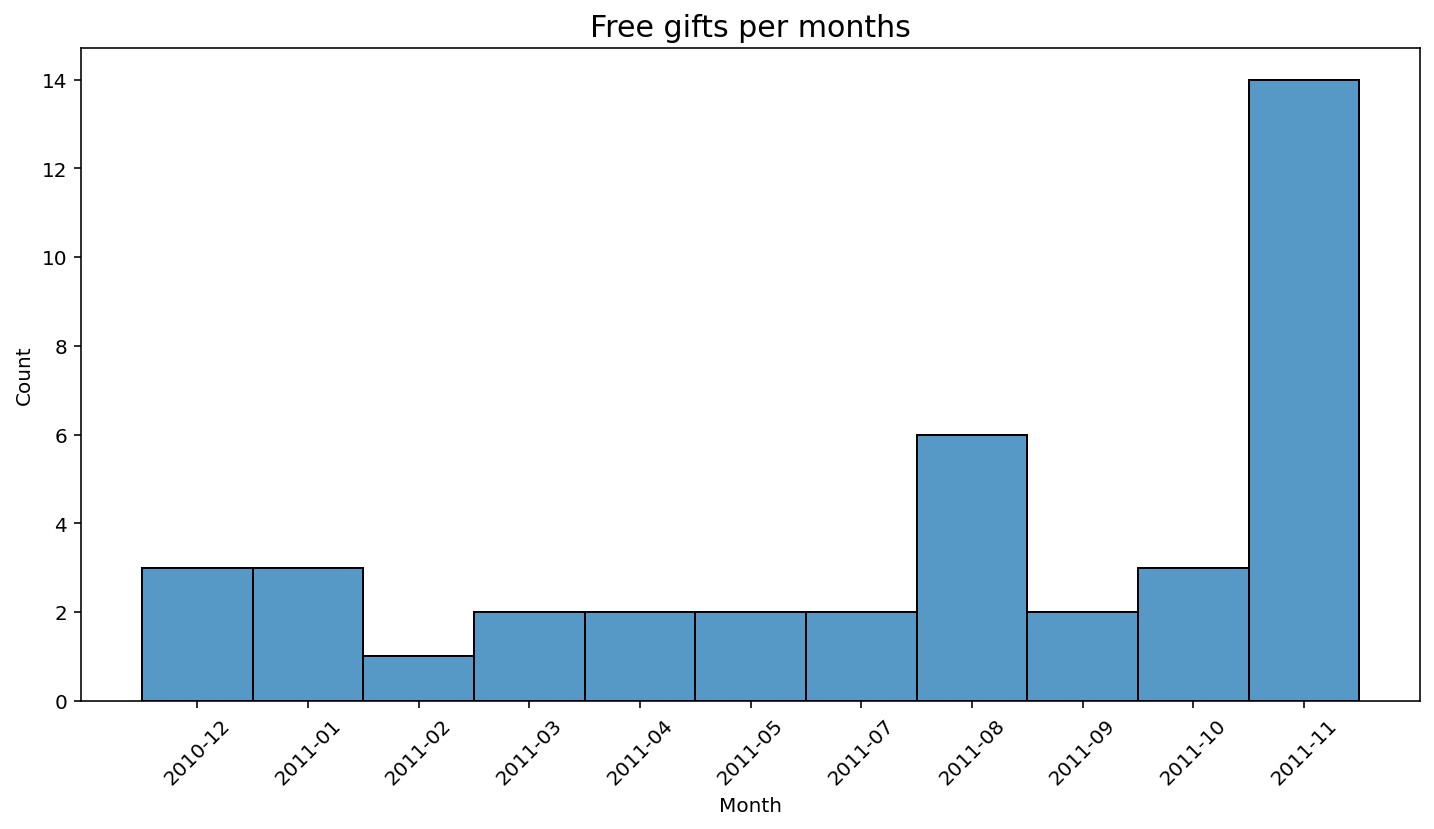

In [18]:
# В какие месяцы были бесплатные товары?
plt.figure(figsize=(12,6))
sns.histplot(x='year_month', data=free_goods)
plt.title('Free gifts per months', fontsize=15)
plt.xticks(rotation=45)
plt.xlabel('Month',fontsize=10);

В среднем компания раздавала товары бесплатно 2 раза в месяц, чаще под новогодние праздники.

## Total Sales (First order vs Reorder)

Посмотрим на соотношение товаров заказанных единожды (first order) и повторных заказов (reorder)

In [19]:
# сортируем по CustomerID , StockCode и InvoiceDate чтобы получить последовательность заказов
df_sort = df.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'])
df_sort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,week,day,weekday,hour,total_price
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346,United Kingdom,2011-01,3,18,Tuesday,10,77183.600
38125,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.040,12346,United Kingdom,2011-01,3,18,Tuesday,10,77183.600
102032,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.250,12347,Iceland,2011-04,14,7,Thursday,10,6.000
157730,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.300,12347,Iceland,2011-06,23,9,Thursday,13,10.800
102015,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.950,12347,Iceland,2011-04,14,7,Thursday,10,17.700


In [20]:
# сдвигаем строки на 1 вниз
df_sort_shift1 = df_sort.shift(1)
df_sort_shift1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,week,day,weekday,hour,total_price
38120,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38125,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.000,2011-01-18 10:01:00,1.040,12346.000,United Kingdom,2011-01,3.000,18.000,Tuesday,10.000,77183.600
102032,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.000,2011-01-18 10:17:00,1.040,12346.000,United Kingdom,2011-01,3.000,18.000,Tuesday,10.000,77183.600
157730,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24.000,2011-04-07 10:43:00,0.250,12347.000,Iceland,2011-04,14.000,7.000,Thursday,10.000,6.000
102015,556201,17021,NAMASTE SWAGAT INCENSE,36.000,2011-06-09 13:01:00,0.300,12347.000,Iceland,2011-06,23.000,9.000,Thursday,13.000,10.800


In [21]:
reorder_df = df_sort.copy()
# если StockCode у датафреймов до и после сдвига совпадают, значит это повторный заказ
reorder_df['reorder'] = np.where(df_sort['StockCode'] == df_sort_shift1['StockCode'], 1, 0)
reorder_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month,week,day,weekday,hour,total_price,reorder
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346,United Kingdom,2011-01,3,18,Tuesday,10,77183.600,0
38125,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.040,12346,United Kingdom,2011-01,3,18,Tuesday,10,77183.600,1
102032,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2011-04-07 10:43:00,0.250,12347,Iceland,2011-04,14,7,Thursday,10,6.000,0
157730,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.300,12347,Iceland,2011-06,23,9,Thursday,13,10.800,0
102015,549222,20665,RED RETROSPOT PURSE,6,2011-04-07 10:43:00,2.950,12347,Iceland,2011-04,14,7,Thursday,10,17.700,0


In [22]:
# попробуем понять какие факторы влияют на раздачу бесплатных подарков
reorder_df.loc[reorder_df['UnitPrice'] == 0, 'free_item'] = 1
reorder_df.loc[reorder_df['UnitPrice'] > 0, 'free_item'] = 0

In [23]:
# их количество довольно мало
reorder_df['free_item'].value_counts()

0.000    406789
1.000        40
Name: free_item, dtype: int64

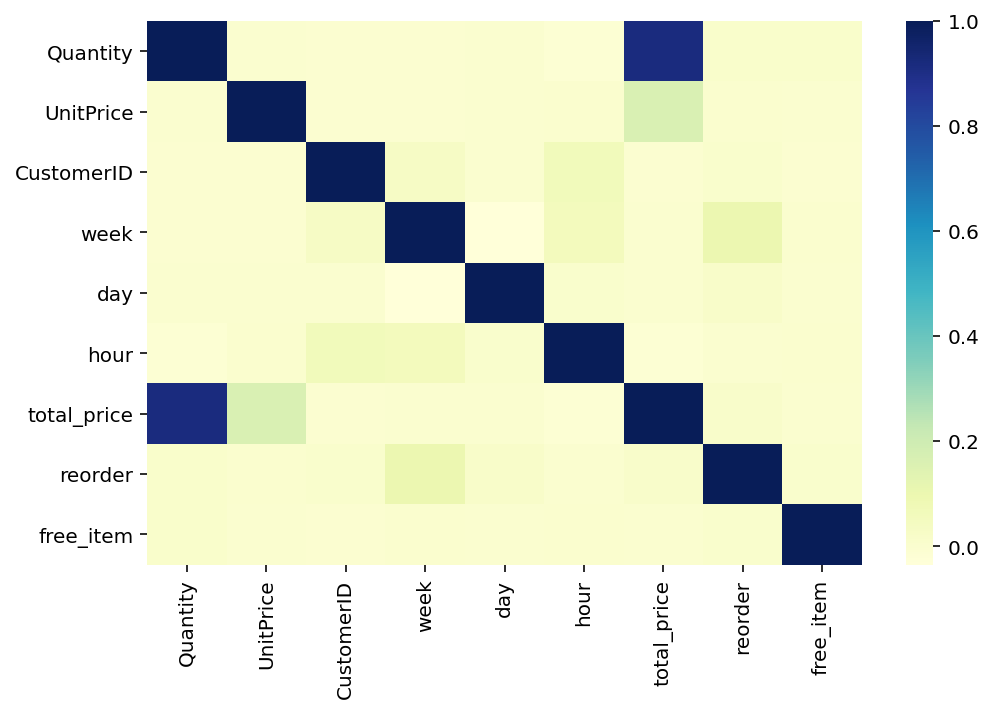

In [24]:
# значимой корреляции между free_item и reorder нет
sns.heatmap(reorder_df.corr(), cmap="YlGnBu");

In [25]:
# top-10 reorder товаров
pd.DataFrame((reorder_df.groupby(['Description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1212
JUMBO BAG RED RETROSPOT,1026
REGENCY CAKESTAND 3 TIER,1018
LUNCH BAG RED RETROSPOT,827
POSTAGE,817
ASSORTED COLOUR BIRD ORNAMENT,739
PARTY BUNTING,708
LUNCH BAG BLACK SKULL.,668
LUNCH BAG SUKI DESIGN,637


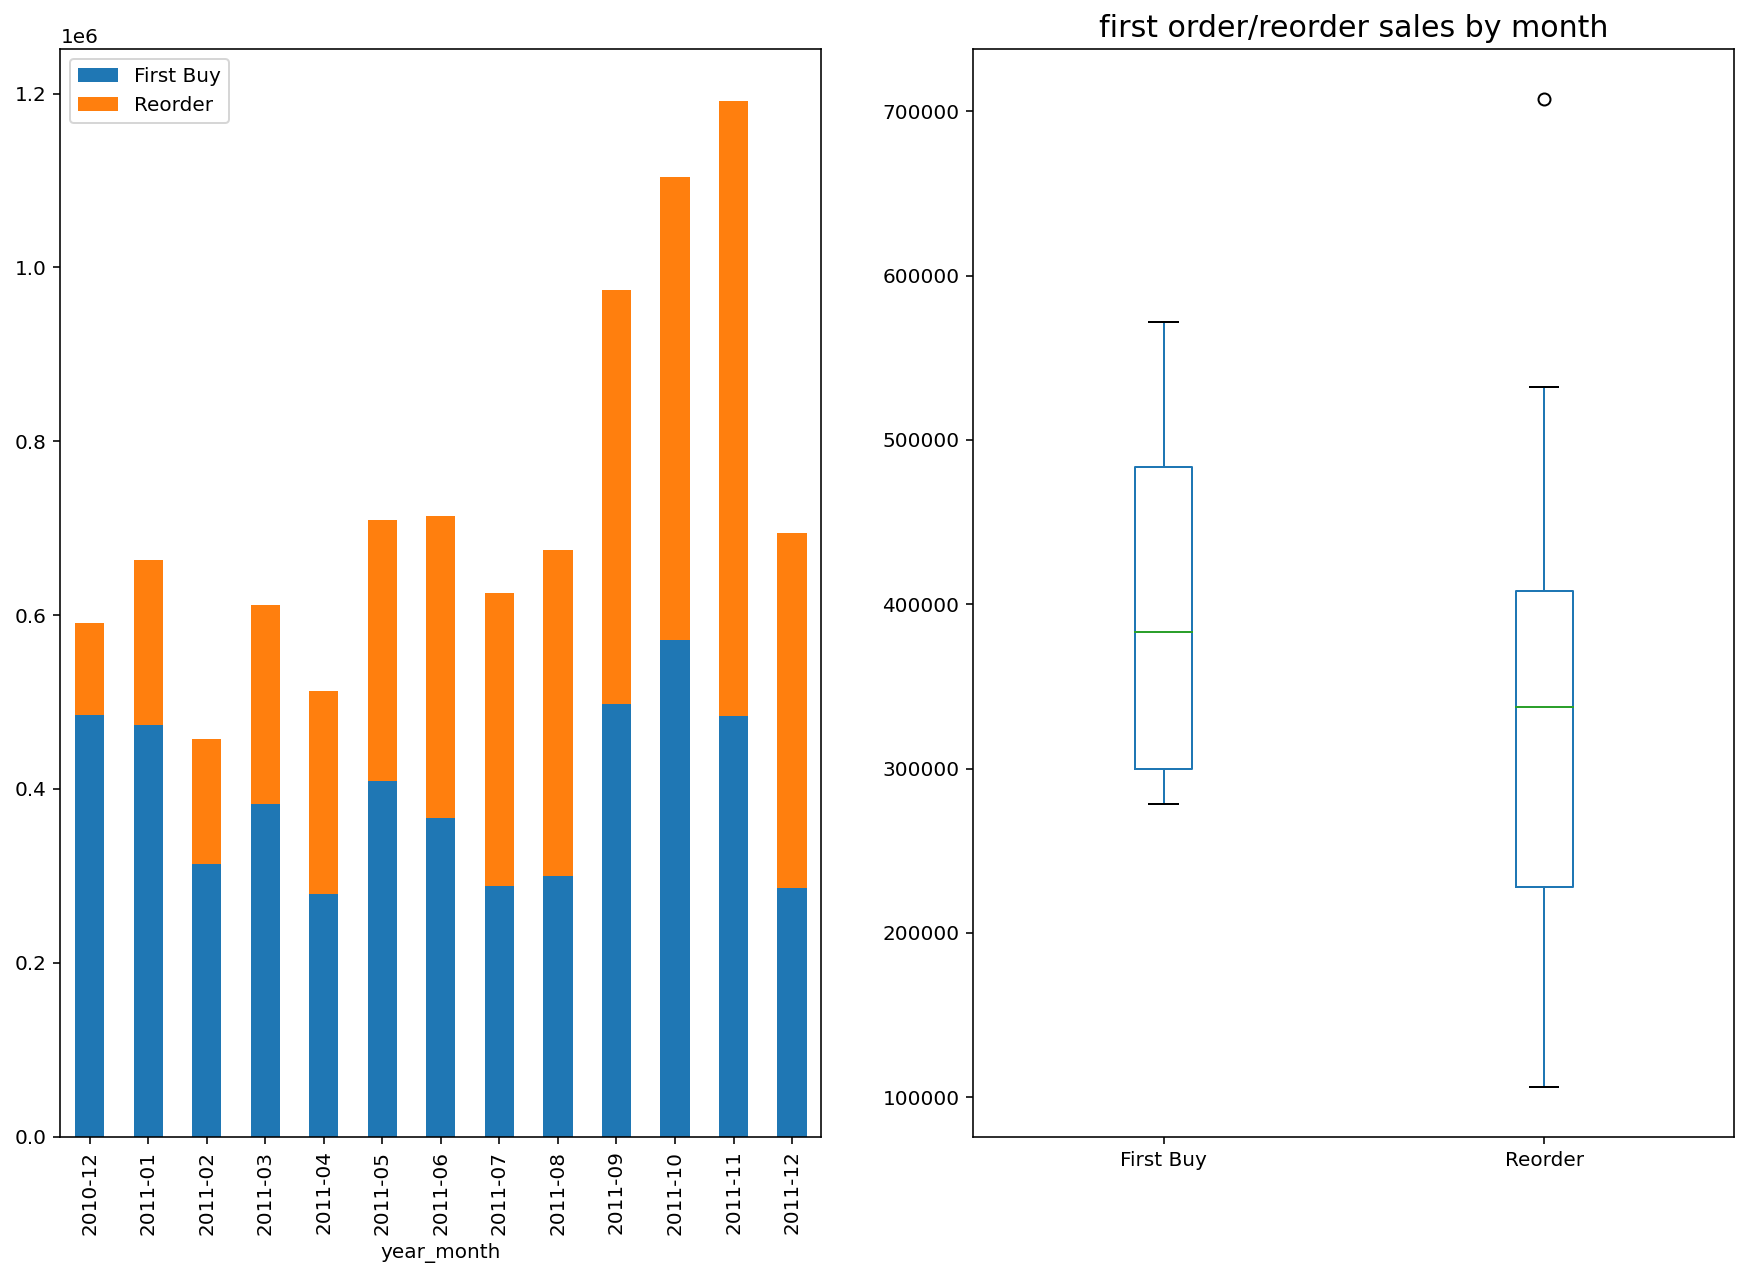

In [26]:
not_reorder_df = (reorder_df[reorder_df['reorder'] == 0].groupby(['year_month'])['total_price'].sum())
reorder = (reorder_df[reorder_df['reorder'] == 1].groupby(['year_month'])['total_price'].sum())
year_month_df = pd.DataFrame([not_reorder_df , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plt.title('first order/reorder sales by month', fontsize=15)
year_month_df.plot.bar(stacked=True, ax=axes[0])
year_month_df.plot.box(ax=axes[1]);

В среднем, одноразовых покупок больше чем перезаказов
